In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
data = pd.read_csv(
    "2017_jun_final.csv",
)

In [2]:
# Прочитайте отриману таблицю, використовуючи метод head
print(data.head(50))

     N                      Должность Язык.программирования Специализация  \
0    1             Junior QA engineer                   NaN     Manual QA   
1    2             Junior QA engineer                   NaN     Manual QA   
2    3              Software Engineer               C#/.NET           NaN   
3    4              Software Engineer            JavaScript           NaN   
4    5       Senior Software Engineer            JavaScript           NaN   
5    6                Project manager                   NaN           NaN   
6    7       Junior Software Engineer               C#/.NET           NaN   
7    8       Senior Software Engineer                   C++           NaN   
8    9       Junior Software Engineer                  Java           NaN   
9   10                       Sysadmin                   NaN           NaN   
10  11                    QA engineer                   NaN    General QA   
11  12               System Architect                 Scala           NaN   

In [3]:
# Визначте розмір таблиці за допомогою методу shape (8704, 25)
print(data.shape)

(8704, 25)


In [4]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(data.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [5]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
data1 = data
data1 = data1.isnull()
gaps = (data1.sum() / data.shape[0]).round(3)
print(gaps)

N                                   0.000
Должность                           0.000
Язык.программирования               0.442
Специализация                       0.829
Общий.опыт.работы                   0.000
Опыт.работы.на.текущем.месте        0.000
Зарплата.в.месяц                    0.000
Изменение.зарплаты.за.12.месяцев    0.000
Город                               0.000
Размер.компании                     0.000
Тип.компании                        0.000
Пол                                 0.000
Возраст                             0.000
Образование                         0.000
Университет                         0.041
Еще.студент                         0.000
Уровень.английского                 0.000
Предметная.область                  0.026
Дата.заполнения                     0.000
User.Agent                          0.000
exp                                 0.000
current_job_exp                     0.000
salary                              0.000
Валюта                            

In [6]:
# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
data1 = data
data2 = gaps[gaps > 0.000]
gaps_cols = data2[1:]
for name_col in gaps_cols.index:
    data = data.drop([name_col], axis=1)
print(data)

         N                 Должность Язык.программирования Общий.опыт.работы  \
0        1        Junior QA engineer                   NaN               0.5   
1        2        Junior QA engineer                   NaN  меньше 3 месяцев   
2        3         Software Engineer               C#/.NET                 4   
3        4         Software Engineer            JavaScript                 5   
4        5  Senior Software Engineer            JavaScript    10 и более лет   
...    ...                       ...                   ...               ...   
8699  8700               QA engineer                   NaN                 1   
8700  8701                 Marketing                   NaN               0.5   
8701  8702  Junior Software Engineer            Ruby/Rails                 1   
8702  8703                 Team lead                   NaN                 6   
8703  8704  Senior Software Engineer                  Java                 7   

     Опыт.работы.на.текущем.месте  Зарп

In [7]:
# Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
data1 = data
data1 = data1.isnull()
gaps = (data1.sum() / data.shape[0]).round(3)
print(gaps)

N                                   0.000
Должность                           0.000
Язык.программирования               0.442
Общий.опыт.работы                   0.000
Опыт.работы.на.текущем.месте        0.000
Зарплата.в.месяц                    0.000
Изменение.зарплаты.за.12.месяцев    0.000
Город                               0.000
Размер.компании                     0.000
Тип.компании                        0.000
Пол                                 0.000
Возраст                             0.000
Образование                         0.000
Еще.студент                         0.000
Уровень.английского                 0.000
Дата.заполнения                     0.000
User.Agent                          0.000
exp                                 0.000
current_job_exp                     0.000
salary                              0.000
dtype: float64


In [8]:
# Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
gaps = gaps.replace({0.000: np.nan})
print(gaps)
gaps = gaps.dropna()
print(gaps)

N                                     NaN
Должность                             NaN
Язык.программирования               0.442
Общий.опыт.работы                     NaN
Опыт.работы.на.текущем.месте          NaN
Зарплата.в.месяц                      NaN
Изменение.зарплаты.за.12.месяцев      NaN
Город                                 NaN
Размер.компании                       NaN
Тип.компании                          NaN
Пол                                   NaN
Возраст                               NaN
Образование                           NaN
Еще.студент                           NaN
Уровень.английского                   NaN
Дата.заполнения                       NaN
User.Agent                            NaN
exp                                   NaN
current_job_exp                       NaN
salary                                NaN
dtype: float64
Язык.программирования    0.442
dtype: float64


In [9]:
# Визначте новий розмір таблиці за допомогою методу shape
print(gaps.shape)

(1,)


In [10]:
# Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = data[data["Язык.программирования"] == "Python"]

In [11]:
# Визначте розмір таблиці python_data за допомогою методу shape (207, 20)
print(python_data.shape)

(207, 20)


In [12]:
data1 = python_data.groupby(["Должность"], group_keys=False)
print((data1.apply(lambda x: x)).head())

       N                 Должность Язык.программирования Общий.опыт.работы  \
12    13         Software Engineer                Python                 1   
68    69         Software Engineer                Python               1.5   
87    88  Junior Software Engineer                Python               0.5   
114  115  Junior Software Engineer                Python               1.5   
143  144  Junior Software Engineer                Python                 1   

    Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
12              меньше 3 месяцев               800   
68                           0.5               900   
87                           0.5               600   
114                          0.5               685   
143                            1               750   

     Изменение.зарплаты.за.12.месяцев Город  Размер.компании    Тип.компании  \
12                                200  Киев    до 50 человек  Аутсорсинговая   
68                                900  Киев   

In [13]:
# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg
#  і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
data2 = data1.agg({"Зарплата.в.месяц": ["max", "min"]}).reset_index()
print(data2)

                  Должность Зарплата.в.месяц      
                                         max   min
0  Junior Software Engineer             1250   100
1  Senior Software Engineer             9200  1300
2         Software Engineer             5400   500
3          System Architect             5000  3000
4            Technical Lead             6200  1425


In [14]:
# Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць.
# Використовуйте її для методу apply та створіть новий стовпчик "avg"
data2 = data1.agg({"Зарплата.в.месяц": ["max", "min"]}).reset_index()
data2.insert(3, "avg", np.nan)
print(data2)

def fill_avg_salary(row, df=data1):
    spec = row["Должность"]
    spec_salary = df.agg({"salary": "mean"}).reset_index()
    print(spec_salary)
    print("***", spec)
    data = spec_salary[spec_salary["Должность"] == spec]["salary"]
    print(data)
    return data

data2["avg"] = data2.apply(lambda x: fill_avg_salary, axis=1)
print(data2)

                  Должность Зарплата.в.месяц       avg
                                         max   min    
0  Junior Software Engineer             1250   100 NaN
1  Senior Software Engineer             9200  1300 NaN
2         Software Engineer             5400   500 NaN
3          System Architect             5000  3000 NaN
4            Technical Lead             6200  1425 NaN
                  Должность Зарплата.в.месяц        \
                                         max   min   
0  Junior Software Engineer             1250   100   
1  Senior Software Engineer             9200  1300   
2         Software Engineer             5400   500   
3          System Architect             5000  3000   
4            Technical Lead             6200  1425   

                                                avg  
                                                     
0  <function fill_avg_salary at 0x000002DECFF60180>  
1  <function fill_avg_salary at 0x000002DECFF60180>  
2  <function fill_av

In [15]:
# Створіть описову статистику за допомогою методу describe для нового стовпчика.
print(data2["avg"].describe())

count                                                    5
unique                                                   1
top       <function fill_avg_salary at 0x000002DECFF60180>
freq                                                     5
Name: avg, dtype: object


In [16]:
# Збережіть отриману таблицю в CSV файл

data2.to_csv("data_new.csv", index=False)

                      Зарплата.в.месяц                   
                                   max         mean   min
Язык.программирования                                    
1С                                2148   941.142857   155
ABAP                              5300  3025.000000  2000
APL                               2250  2250.000000  2250
C                                 5000  2037.685185   250
C#/.NET                           8000  2084.525240   100
C++                              18000  2398.194444    80
Delphi                            3000  1265.647059   180
Erlang                            4200  2520.000000   500
Flex/Flash/AIR                    4800  2932.000000  1300
Golang                            7700  3043.333333   610
Haskell                          10000  3850.000000   500
Java                              8800  1970.929457    75
JavaScript                        8000  1645.811339    95
Objective-C                       6000  2028.602151   250
Other         

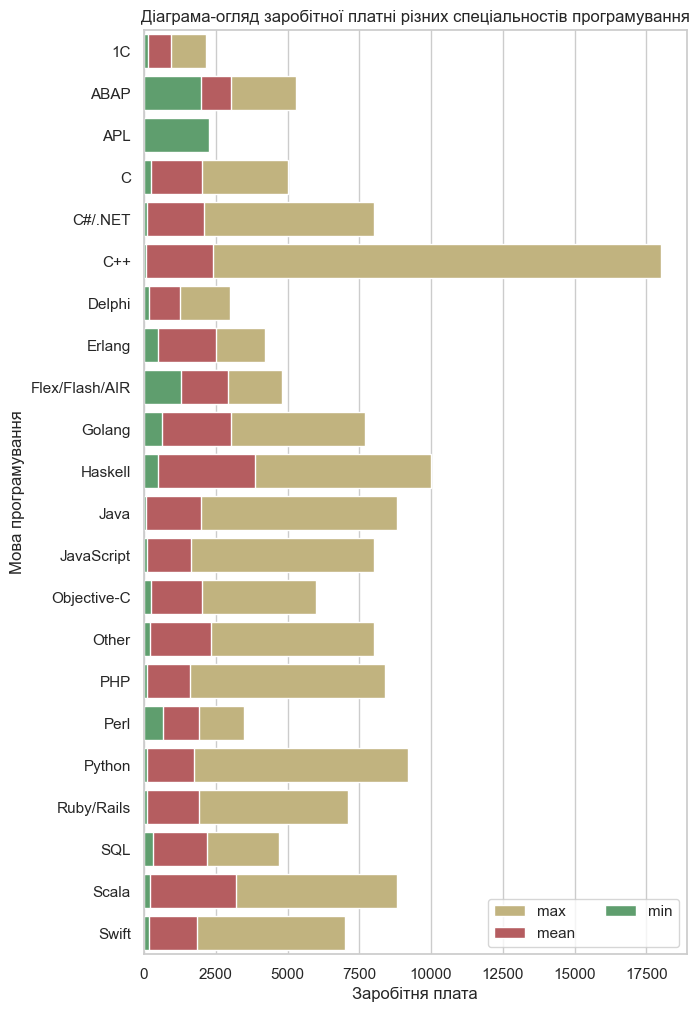

In [17]:
# Діаграма-огляд заробітної платні різних спеціальностів програмування
data_progr_lang = data[["Язык.программирования", "Зарплата.в.месяц"]].groupby(
    "Язык.программирования", sort=True
)
spec_salary = data_progr_lang.agg(["max", "mean", "min"])
print(spec_salary)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 12))
sns.barplot(
    x=("Зарплата.в.месяц", "max"),
    y="Язык.программирования",
    data=spec_salary,
    label="max",
    color="y",
)
sns.barplot(
    x=("Зарплата.в.месяц", "mean"),
    y="Язык.программирования",
    data=spec_salary,
    label="mean",
    color="r",
)
sns.barplot(
    x=("Зарплата.в.месяц", "min"),
    y="Язык.программирования",
    data=spec_salary,
    label="min",
    color="g",
)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(
    ylabel="Мова програмування",
    xlabel="Заробітня плата",
    title="Діаграма-огляд заробітної платні різних спеціальностів програмування",
)
plt.show()

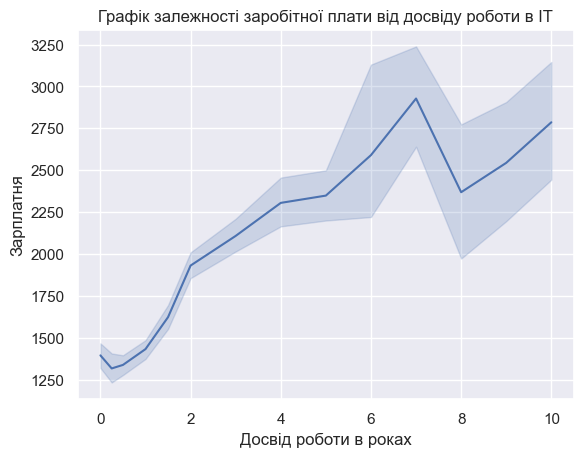

In [18]:
# Графік залежності заробітної плати від досвіду роботи в IT
sns.set_style("darkgrid")
sns.lineplot(x="current_job_exp", y="salary", data=data)
plt.title("Графік залежності заробітної плати від досвіду роботи в IT")
plt.xlabel("Досвід роботи в роках")
plt.ylabel("Зарплатня")
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

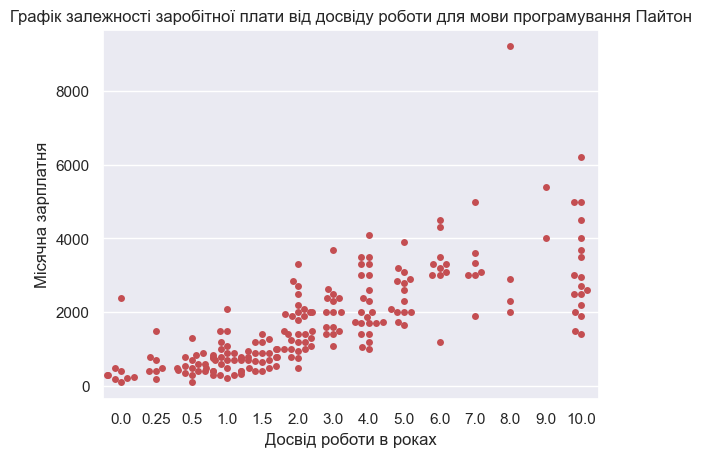

In [21]:
# Графік залежності заробітної плати від досвіду роботи для мови програмування Пайтон
sns.swarmplot(x="exp", y="Зарплата.в.месяц", data=python_data, color="r")
plt.title(
    "Графік залежності заробітної плати від досвіду роботи для мови програмування Пайтон"
)
plt.xlabel("Досвід роботи в роках")
plt.ylabel("Місячна зарплатня")
plt.show()